
# **OPTI-556: Computational Imaging**  
# Haley Wiskoski  
Homework #1   
Due: Tuesday September 7th, 2021

## **1. Libraries**




In [35]:
%matplotlib inline
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pywt
import scipy
from scipy import signal
from scipy.interpolate import interp1d, CubicSpline, InterpolatedUnivariateSpline
from scipy.signal import convolve2d, convolve
from skimage import color, data, restoration, exposure
from skimage import io
from google.colab import files
from numpy import linspace, sqrt, sin, cos, arange, exp, abs, vectorize
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 16})

## **2. Fourier Series Estimation**    

Text(0.5, 1.0, 'Fourth Test Function, f4(x)')

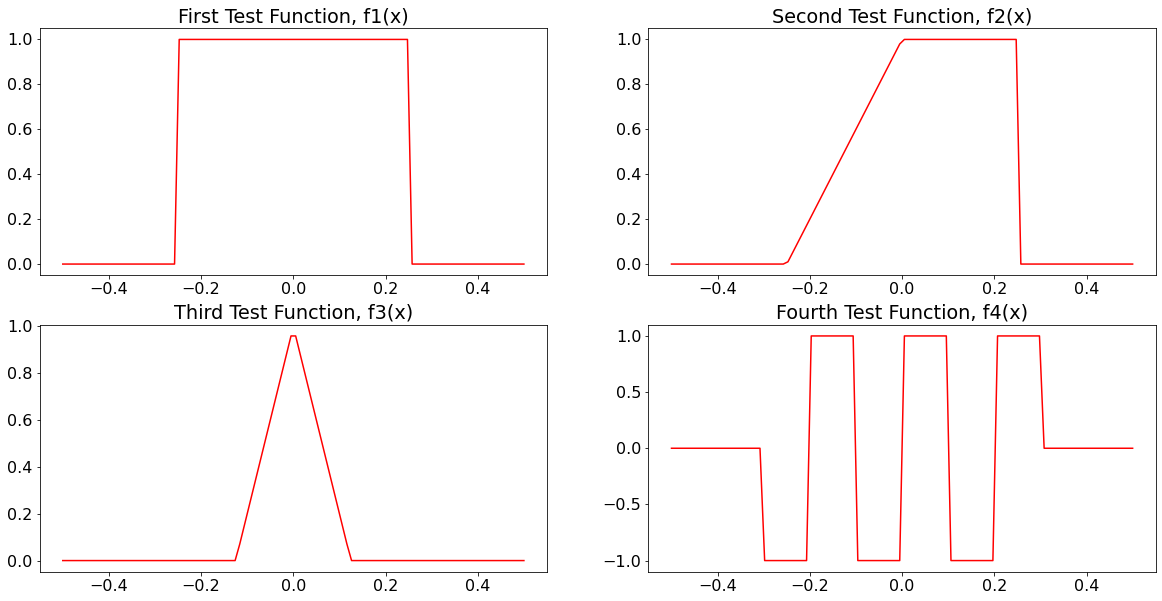

In [25]:
x = np.linspace(-.5,.5,100)

# Defining first function f1(x), rectangular pulse
def f1(x):
  if x < -0.25: 
    f1 = 0. 
  elif x < 0.25:
    f1 = 1.
  else: f1 = 0.
  return f1

# Second function f2(x), sloped rectangular pulse
def f2(x):
  if x < -0.25:
    f2 = 0.
  elif x < 0:
    f2 = 4.*(x + 0.25)
  elif x < 0.25:
    f2 = 1.
  else:
    f2 = 0.
  return f2

# Third function f3(x), triangular pulse
def f3(x):
  if -0.125 < x < 0.125:
    f3 = -1*signal.sawtooth(2 * np.pi *2* x, 0.5)
  else: 
    f3 = 0.
  return f3

# Fourth function f4(x), rectangle wave
def f4(x):
  if -0.3 < x < 0.3:
    f4 = signal.square(2 * np.pi * 5 * x)
  else: 
    f4 = 0.
  return f4


# Plotting the four test functions
vf1 = vectorize(f1)
vf2 = vectorize(f2)
vf3 = vectorize(f3)
vf4 = vectorize(f4)

plt.subplot(2,2,1) 
plt.plot(x,vf1(x),'r')
plt.title('First Test Function, f1(x)')

plt.subplot(2,2,2) 
plt.plot(x,vf2(x),'r')
plt.title('Second Test Function, f2(x)')

plt.subplot(2,2,3) 
plt.plot(x,vf3(x),'r')
plt.title('Third Test Function, f3(x)')

plt.subplot(2,2,4) 
plt.plot(x,vf4(x),'r')
plt.title('Fourth Test Function, f4(x)')

### A) Test 1: Rect Pulse

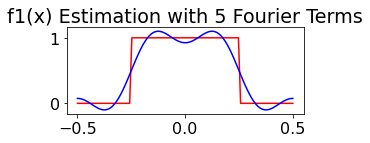

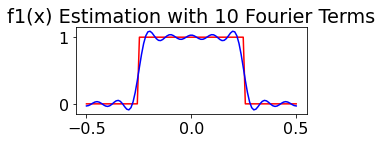

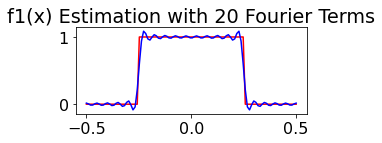

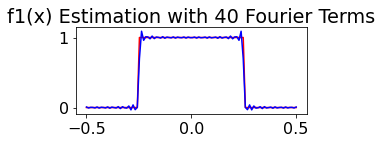

In [27]:
# FIRST FUNCTION: Simulating fourier series estimation
idx = 0;
x_vec = np.linspace(-0.5, 0.5, 100);

for terms in [5, 10, 20, 40]: #various number of terms to test
  idx = idx + 1
  sin_v = np.zeros(terms) #initializing two vectors to be populated
  cos_v = np.zeros(terms)
 
  for pop in np.arange(terms): 
    sin_v[pop]=2 * integrate.quad(lambda x: vf1(x) * np.sin(2 * np.pi * pop * x), -0.5, 0.5)[0]
    cos_v[pop]=2 * integrate.quad(lambda x: vf1(x) * np.cos(2 * np.pi * pop * x), -0.5, 0.5)[0]
    cos_v[0]=cos_v[0]

# Calculating estimate using sin & cosine components for number of fourier terms
    def est1(x, sin_v, cos_v):
      est1_new = 0;
      for pop in np.arange(len(sin_v)):
        est1_new = est1_new + sin_v[pop]*np.sin(2*np.pi*pop*x) + cos_v[pop]*np.cos(2*np.pi*pop*x)
      return est1_new

# Plotting the estimations from various number of fourier terms
  plt.subplots(figsize = (10,5))
  plt.subplot(2,2,idx)
  plt.plot(x_vec, vf1(x_vec), 'r', x_vec, est1(x_vec, sin_v, cos_v)-cos_v[0]/2., 'b')
  plt.title("f1(x) Estimation with %i Fourier Terms" %(pop+1))
  plt.tight_layout(pad=3)


### B) Test 2: Sloped "Rect" Pulse

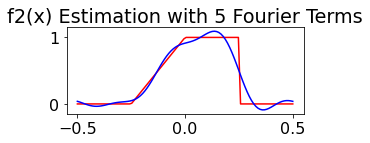

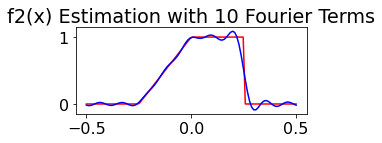

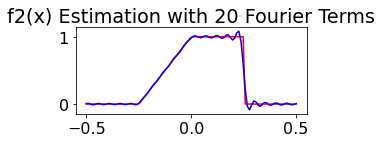

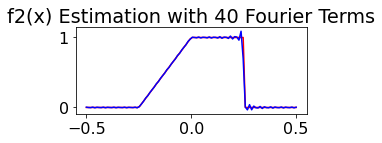

In [28]:
# SECOND FUNCTION: Simulating fourier series estimation
idx = 0;
x_vec = np.linspace(-0.5, 0.5, 100);

for terms in [5, 10, 20, 40]: #various number of terms to test
  idx = idx + 1
  sin_v = np.zeros(terms) #initializing two vectors to be populated
  cos_v = np.zeros(terms)
 
  for pop in np.arange(terms): 
    sin_v[pop]=2 * integrate.quad(lambda x: vf2(x) * np.sin(2 * np.pi * pop * x), -0.5, 0.5)[0]
    cos_v[pop]=2 * integrate.quad(lambda x: vf2(x) * np.cos(2 * np.pi * pop * x), -0.5, 0.5)[0]
    cos_v[0]=cos_v[0]

# Calculating estimate using sin & cosine components for number of fourier terms
    def est2(x, sin_v, cos_v):
      est2_new = 0;
      for pop in np.arange(len(sin_v)):
        est2_new = est2_new + sin_v[pop]*np.sin(2*np.pi*pop*x) + cos_v[pop]*np.cos(2*np.pi*pop*x)
      return est2_new

# Plotting the estimations from various number of fourier terms
  plt.subplots(figsize = (10,5))
  plt.subplot(2,2,idx)
  plt.plot(x_vec, vf2(x_vec), 'r', x_vec, est2(x_vec, sin_v, cos_v)-cos_v[0]/2., 'b')
  plt.title("f2(x) Estimation with %i Fourier Terms" %(pop+1))
  plt.tight_layout(pad=3)

### C) Test 3: Triangle Pulse

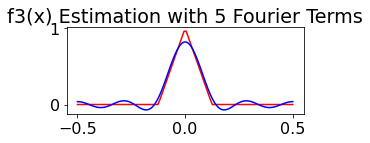

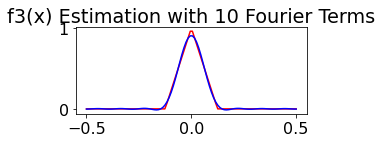

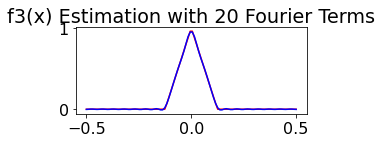

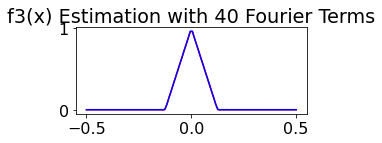

In [29]:
# THIRD FUNCTION: Simulating fourier series estimation
idx = 0;
x_vec = np.linspace(-0.5, 0.5, 100);

for terms in [5, 10, 20, 40]: #various number of terms to test
  idx = idx + 1
  sin_v = np.zeros(terms) #initializing two vectors to be populated
  cos_v = np.zeros(terms)
 
  for pop in np.arange(terms): 
    sin_v[pop]=2 * integrate.quad(lambda x: vf3(x) * np.sin(2 * np.pi * pop * x), -0.5, 0.5)[0]
    cos_v[pop]=2 * integrate.quad(lambda x: vf3(x) * np.cos(2 * np.pi * pop * x), -0.5, 0.5)[0]
    cos_v[0]=cos_v[0]

# Calculating estimate using sin & cosine components for number of fourier terms
    def est3(x, sin_v, cos_v):
      est3_new = 0;
      for pop in np.arange(len(sin_v)):
        est3_new = est3_new + sin_v[pop]*np.sin(2*np.pi*pop*x) + cos_v[pop]*np.cos(2*np.pi*pop*x)
      return est3_new

# Plotting the estimations from various number of fourier terms
  plt.subplots(figsize = (10,5))
  plt.subplot(2,2,idx)
  plt.plot(x_vec, vf3(x_vec), 'r', x_vec, est3(x_vec, sin_v, cos_v)-cos_v[0]/2., 'b')
  plt.title("f3(x) Estimation with %i Fourier Terms" %(pop+1))
  plt.tight_layout(pad=3)

### D) Test 4: Rectangular Wave

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on t

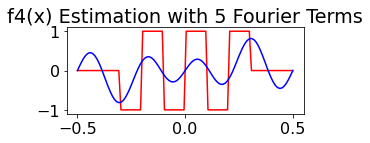

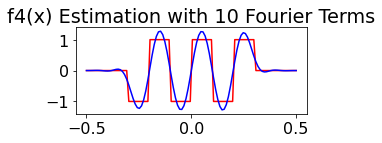

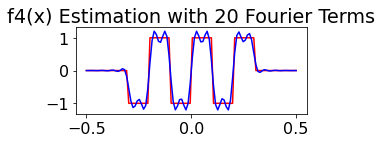

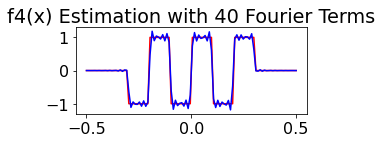

In [30]:
# FOURTH FUNCTION: Simulating fourier series estimation
idx = 0;
x_vec = np.linspace(-0.5, 0.5, 100);

for terms in [5, 10, 20, 40]: #various number of terms to test
  idx = idx + 1
  sin_v = np.zeros(terms) #initializing two vectors to be populated
  cos_v = np.zeros(terms)
 
  for pop in np.arange(terms): 
    sin_v[pop]=2 * integrate.quad(lambda x: vf4(x) * np.sin(2 * np.pi * pop * x), -0.5, 0.5)[0]
    cos_v[pop]=2 * integrate.quad(lambda x: vf4(x) * np.cos(2 * np.pi * pop * x), -0.5, 0.5)[0]
    cos_v[0]=cos_v[0]

# Calculating estimate using sin & cosine components for number of fourier terms
    def est4(x, sin_v, cos_v):
      est4_new = 0;
      for pop in np.arange(len(sin_v)):
        est4_new = est4_new + sin_v[pop]*np.sin(2*np.pi*pop*x) + cos_v[pop]*np.cos(2*np.pi*pop*x)
      return est4_new

# Plotting the estimations from various number of fourier terms
  plt.subplots(figsize = (10,5))
  plt.subplot(2,2,idx)
  plt.plot(x_vec, vf4(x_vec), 'r', x_vec, est4(x_vec, sin_v, cos_v)-cos_v[0]/2., 'b')
  plt.title("f4(x) Estimation with %i Fourier Terms" %(pop+1))
  plt.tight_layout(pad=3)

### E) Discussion

There is a lot to uncover here with this experiment. Firstly, it is obvious that we observe Gibbs phenomena with the rect pulse, primarily along the edges. This is due to the fact that much higher frequency approximations are needed for edges, and higher frequency details. Moving onto the sloped rect pulse, the sloped portion is approximated much closer with very little "ringing", but we again see Gibbs phenomena along the edge of the righthand side of the pulse. What surprised me was the ability to approximate the triangle pulse with fewer terms as compared to the rect pulse. I had aassumed that the peak of the pulse would pose as an issue and would be the most difficult to approximate. While this was the case minimally, we needed fewer terms to approximate the triangle as compared to the rect. This leads me to believe that as as the triangle pulse were to be "rounded off" and more closely resemble a gaussian, we would need even fewer terms to approximate. Lastly, we see that the rect pulse train would require maany more fourier tersm to approximate. While the general "form" of the pulse is approximated initially with few terms, the high frequency details, the edges of the rects, require further approximation and terms. This exploration drives home the theory of  a a delta funtion, or a function which encompasses equal amounts of all frequencies. The edges of the rect resemble a delta function in this way, as it would require the application of many more frequencies to approximate. 


## **3. Exploring Effects of Sampling Periods**  


### A) First Test Signal

Text(0.5, 1.0, '$|{\\hat f}(u)|$')

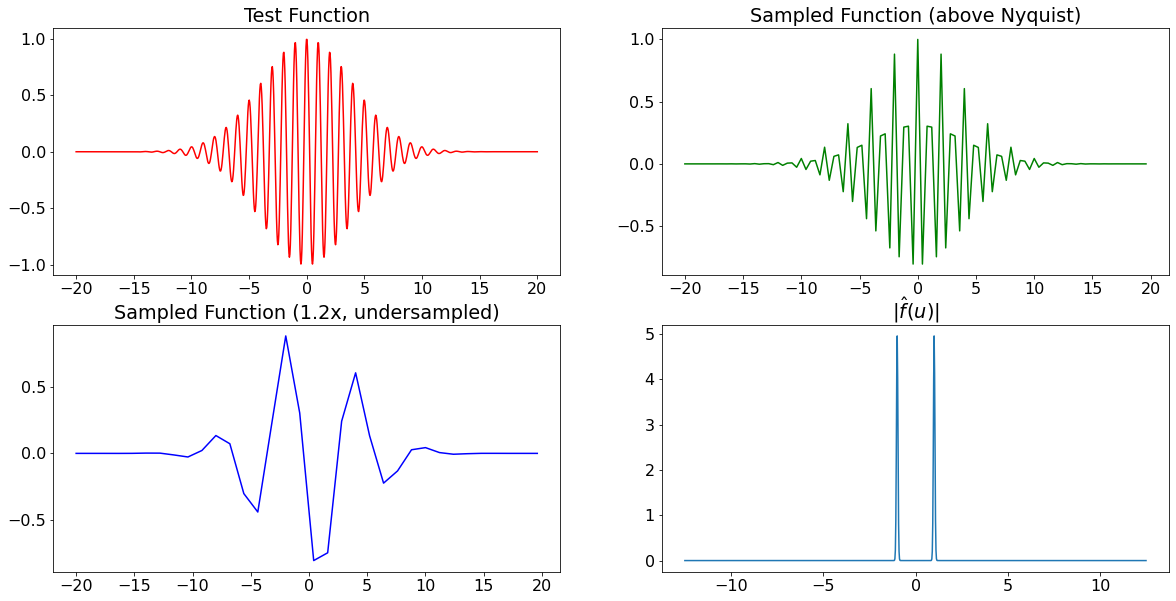

In [90]:
# Defining parameters
xrange = np.linspace(-20, 20, 1000)
urange = np.arange(-500./40., 500./40., 1./40.)
srange_up = np.arange(-20, 20, .4) #above Nyquist
srange_down = np.arange(-20,20,1.2) #undersampled

# Defining the first function
def fx(x):
  fx =np.exp(-0.01*np.pi*x**2)
  fx=fx*np.cos(2*np.pi*x)
  return fx

# Plotting each 
plt.subplot(2,2,1)
plt.plot(xrange, fx(xrange), 'r')
plt.title("Test Function")
plt.subplot(2,2,2)
plt.plot(srange_up, fx(srange_up), 'g')
plt.title('Sampled Function (above Nyquist)')
plt.subplot(2,2,3)
plt.plot(srange_down, fx(srange_down), 'b')
plt.title('Sampled Function (1.2x, undersampled)')
plt.subplot(2,2,4)
plt.plot(urange, (1./(urange[-1]-urange[0]))*np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(xrange))))))
plt.title('$|{\hat f}(u)|$')

#### a) Above Nyquist Sampling

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


(-5.0, 5.0)

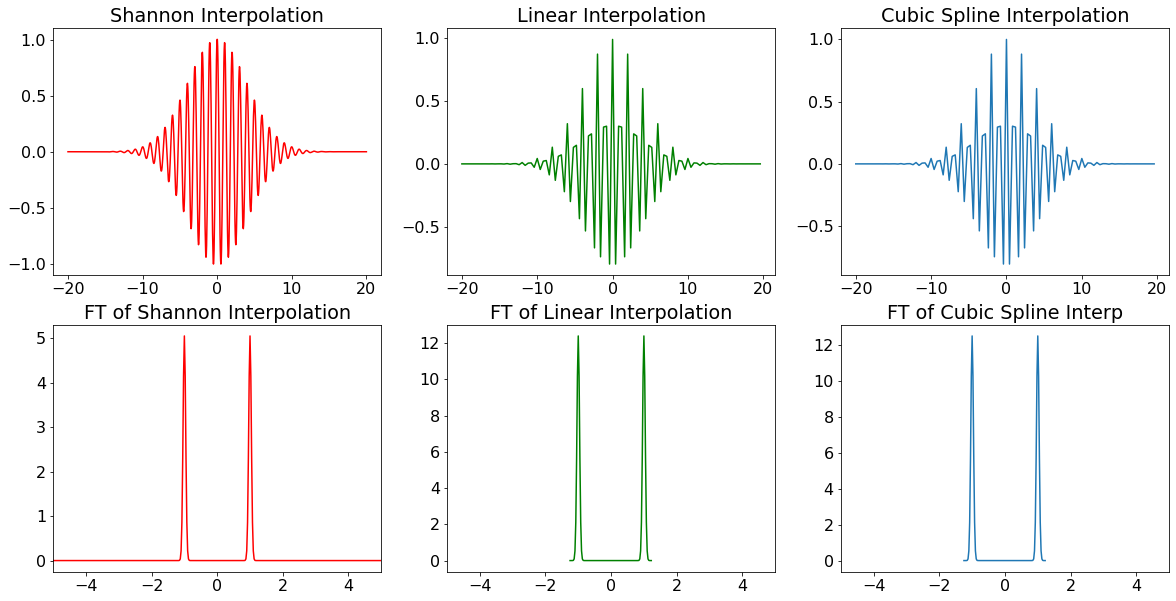

In [91]:
# Interpolate three ways: Shannon, linear, cubic

# SHANNON
interP = np.zeros(1000)
usrange = srange_up/(.4*40.)
for pip in np.arange(len(srange_up)):
  interP = interP + fx(srange_up[pip])*np.sinc((usrange[-1]-usrange[0])*(xrange-srange_up[pip]))
fftP = 0.*urange;
fftP[(np.int(len(fftP)/2)-np.int(len(srange_up)/2)):(np.int(len(fftP)/2)-np.int(len(srange_up)/2)+len(srange_up))]=(1./(usrange[-1]-usrange[0]))*np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(srange_up))));

# LINEAR
fx_lin = interp1d(xrange, fx(xrange), kind='linear')

# CUBIC SPLINE
fx_cubic = CubicSpline(xrange, fx(xrange))

# Plotting Interpolations
plt.subplot(2,3,1) #SHANNON
plt.plot(xrange,interP, 'r')
plt.title('Shannon Interpolation')
plt.subplot(2,3,2)
plt.plot(srange_up, fx_lin(srange_up), 'g')
plt.title('Linear Interpolation')
plt.subplot(2,3,3)
plt.plot(srange_up, fx_cubic(srange_up))
plt.title('Cubic Spline Interpolation')

plt.subplot(2,3,4)
plt.plot(urange, np.abs(fftP), 'r')
plt.title('FT of Shannon Interpolation')
plt.xlim(-5, 5)
plt.subplot(2,3,5)
plt.plot(usrange, np.abs(np.fft.fftshift(np.fft.fft(fx_lin(srange_up)))), 'g')
plt.title('FT of Linear Interpolation')
plt.xlim(-5, 5)
plt.subplot(2,3,6)
plt.plot(usrange, np.abs(np.fft.fftshift(np.fft.fft(fx_cubic(srange_up)))))
plt.title('FT of Cubic Spline Interp')
plt.xlim(-5, 5)

#### b) 1.2x Undersampling

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


(-1.0, 1.0)

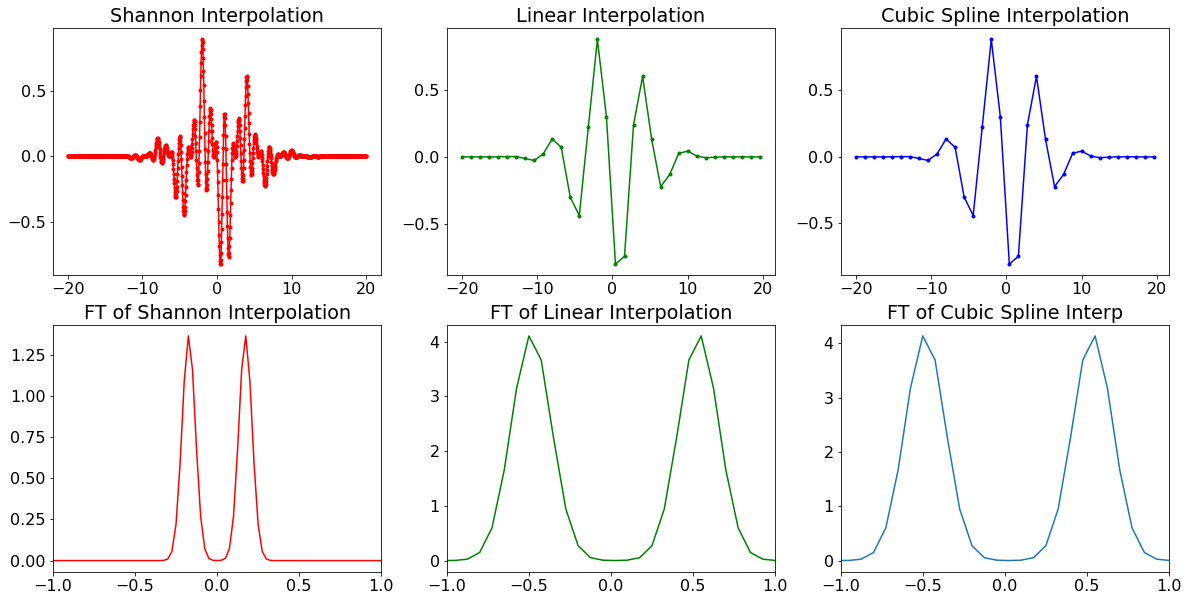

In [92]:
# Interpolate three ways: Shannon, linear, cubic

# SHANNON
interP = np.zeros(1000)
usrange = srange_down/(.4*40.)
for pip in np.arange(len(srange_down)):
  interP = interP + fx(srange_down[pip])*np.sinc((usrange[-1]-usrange[0])*(xrange-srange_down[pip]))
fftP = 0.*urange;
fftP[(np.int(len(fftP)/2)-np.int(len(srange_down)/2)):(np.int(len(fftP)/2)-np.int(len(srange_down)/2)+len(srange_down))]=(1./(usrange[-1]-usrange[0]))*np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(srange_down))));

# Plotting Interpolations
plt.subplot(2,3,1) #SHANNON
plt.plot(xrange,interP, 'r.-')
plt.title('Shannon Interpolation')
plt.subplot(2,3,2)
plt.plot(srange_down, fx_lin(srange_down), 'g.-')
plt.title('Linear Interpolation')
plt.subplot(2,3,3)
plt.plot(srange_down, fx_cubic(srange_down), 'b.-')
plt.title('Cubic Spline Interpolation')

plt.subplot(2,3,4)
plt.plot(urange, np.abs(fftP), 'r')
plt.title('FT of Shannon Interpolation')
plt.xlim(-1,1)
plt.subplot(2,3,5)
plt.plot(usrange, np.abs(np.fft.fftshift(np.fft.fft(fx_lin(srange_down)))), 'g')
plt.title('FT of Linear Interpolation')
plt.xlim(-1,1)
plt.subplot(2,3,6)
plt.plot(usrange, np.abs(np.fft.fftshift(np.fft.fft(fx_cubic(srange_down)))))
plt.title('FT of Cubic Spline Interp')
plt.xlim(-1,1)

### B) Second Test Signal


Text(0.5, 1.0, '$|{\\hat f}(u)|$')

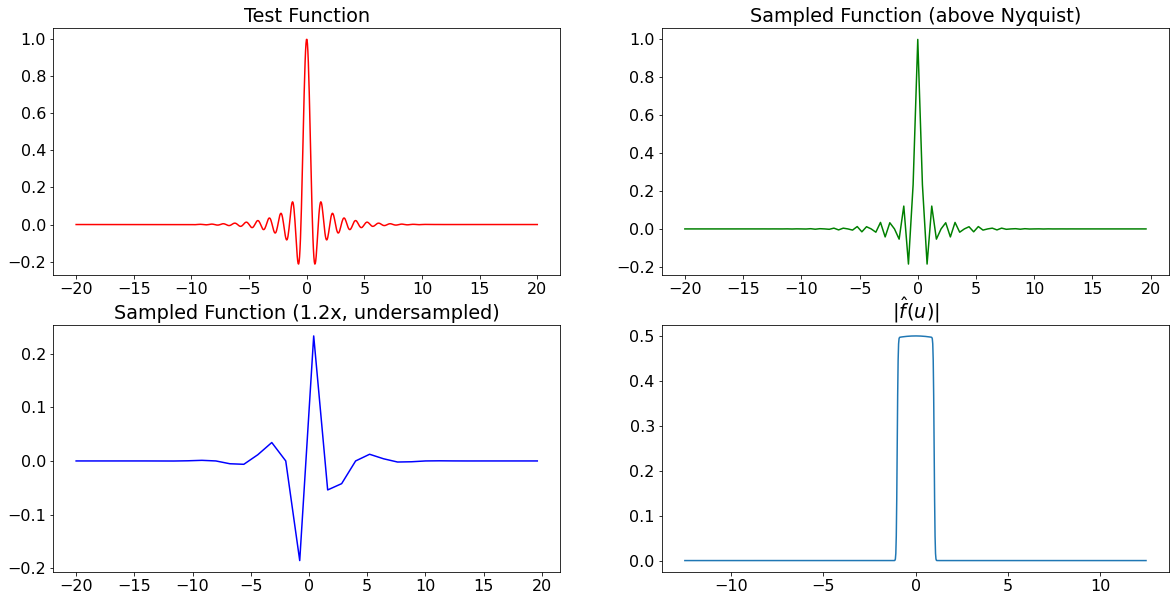

In [71]:
# Defining parameters
xrange = np.linspace(-20, 20, 1000)
urange = np.arange(-500./40., 500./40., 1./40.)
srange_up = np.arange(-20, 20, .4) #above Nyquist
srange_down = np.arange(-20,20,1.2) #undersampled

# Defining the first function, sinc within exp envelope
def fx(x):
  fx = np.sinc(2*x) * np.exp(-0.01*np.pi*x**2)
  return fx

# Plotting each 
plt.subplot(2,2,1)
plt.plot(xrange, fx(xrange), 'r')
plt.title("Test Function")
plt.subplot(2,2,2)
plt.plot(srange_up, fx(srange_up), 'g')
plt.title('Sampled Function (above Nyquist)')
plt.subplot(2,2,3)
plt.plot(srange_down, fx(srange_down), 'b')
plt.title('Sampled Function (1.2x, undersampled)')
plt.subplot(2,2,4)
plt.plot(urange, (1./(urange[-1]-urange[0]))*np.real(np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(xrange))))))
plt.title('$|{\hat f}(u)|$')

#### a) Above Nyquist Sampling

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'FT of Cubic Spline Interp')

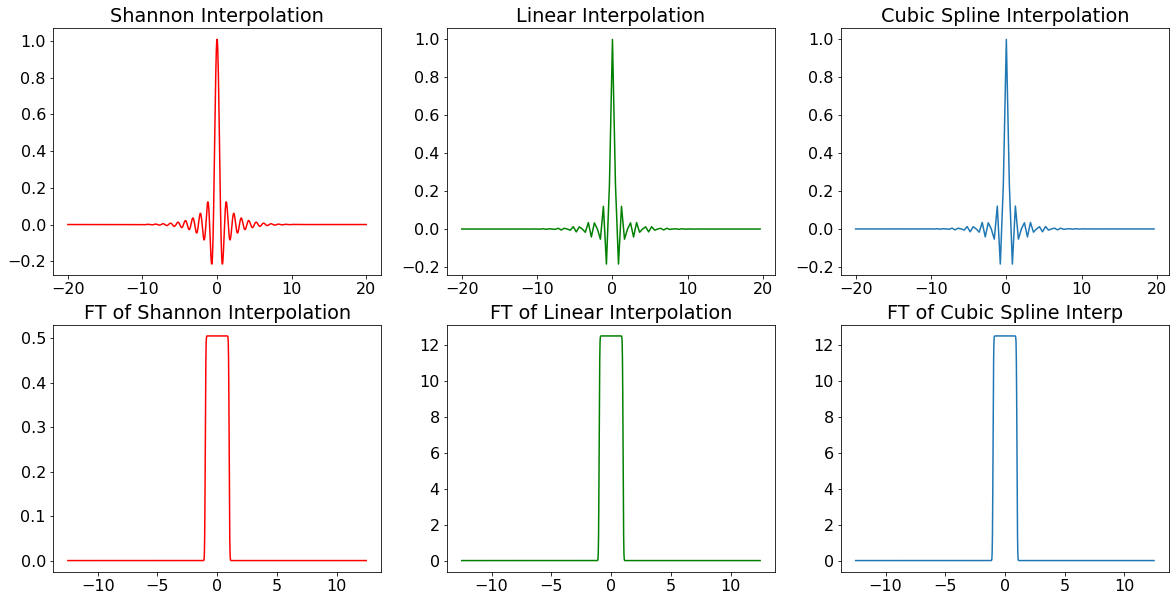

In [72]:
# Interpolate three ways: Shannon, linear, cubic

# SHANNON
interP = np.zeros(1000)
usrange = srange_up/(.4*40.)
for pip in np.arange(len(srange_up)):
  interP = interP + fx(srange_up[pip])*np.sinc((usrange[-1]-usrange[0])*(xrange-srange_up[pip]))
fftP = 0.*urange;
fftP[(np.int(len(fftP)/2)-np.int(len(srange_up)/2)):(np.int(len(fftP)/2)-np.int(len(srange_up)/2)+len(srange_up))]=(1./(usrange[-1]-usrange[0]))*np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(srange_up))));

# LINEAR
fx_lin = interp1d(xrange, fx(xrange), kind='linear')

# CUBIC SPLINE
fx_cubic = CubicSpline(xrange, fx(xrange))

# Plotting Interpolations
plt.subplot(2,3,1) #SHANNON
plt.plot(xrange,interP, 'r')
plt.title('Shannon Interpolation')
plt.subplot(2,3,2)
plt.plot(srange_up, fx_lin(srange_up), 'g')
plt.title('Linear Interpolation')
plt.subplot(2,3,3)
plt.plot(srange_up, fx_cubic(srange_up))
plt.title('Cubic Spline Interpolation')

plt.subplot(2,3,4)
plt.plot(urange, np.abs(fftP), 'r')
plt.title('FT of Shannon Interpolation')
plt.subplot(2,3,5)
plt.plot(urange, np.abs(np.fft.fftshift(np.fft.fft(fx_lin(xrange)))), 'g')
plt.title('FT of Linear Interpolation')
plt.subplot(2,3,6)
plt.plot(urange, np.abs(np.fft.fftshift(np.fft.fft(fx_cubic(xrange)))))
plt.title('FT of Cubic Spline Interp')

#### b) 1.2x Undersampling

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


Text(0.5, 1.0, 'FT of Cubic Spline Interp')

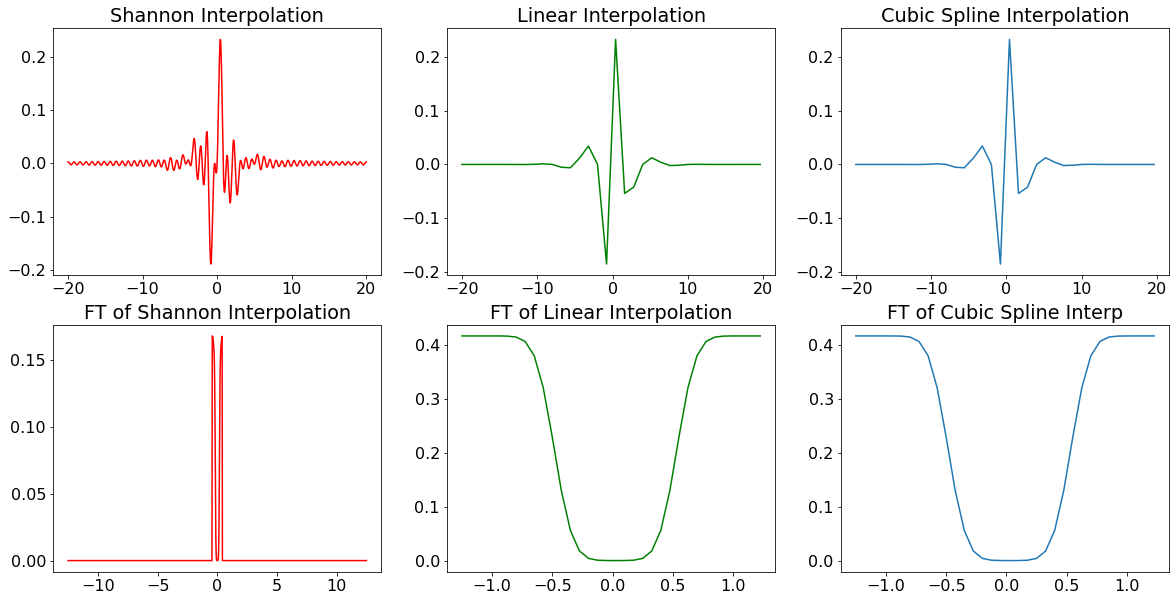

In [81]:
# Interpolate three ways: Shannon, linear, cubic

# SHANNON
interP = np.zeros(1000)
usrange = srange_down/(.4*40.)
for pip in np.arange(len(srange_down)):
  interP = interP + fx(srange_down[pip])*np.sinc((usrange[-1]-usrange[0])*(xrange-srange_down[pip]))
fftP = 0.*urange;
fftP[(np.int(len(fftP)/2)-np.int(len(srange_down)/2)):(np.int(len(fftP)/2)-np.int(len(srange_down)/2)+len(srange_down))]=(1./(usrange[-1]-usrange[0]))*np.fft.fftshift(np.fft.fft(np.fft.fftshift(fx(srange_down))));

# LINEAR
fx_lin = interp1d(srange_down, fx(srange_down), kind='linear')

# CUBIC SPLINE
fx_cubic = CubicSpline(srange_down, fx(srange_down))

# Plotting Interpolations
plt.subplot(2,3,1) #SHANNON
plt.plot(xrange,interP, 'r')
plt.title('Shannon Interpolation')
plt.subplot(2,3,2)
plt.plot(srange_down, fx_lin(srange_down), 'g')
plt.title('Linear Interpolation')
plt.subplot(2,3,3)
plt.plot(srange_down, fx_cubic(srange_down))
plt.title('Cubic Spline Interpolation')

plt.subplot(2,3,4)
plt.plot(urange, np.abs(fftP), 'r')
plt.title('FT of Shannon Interpolation')
plt.subplot(2,3,5)
plt.plot(usrange, np.abs(np.fft.fftshift(np.fft.fft(fx_lin(srange_down)))), 'g')
plt.title('FT of Linear Interpolation')
plt.subplot(2,3,6)
plt.plot(usrange, np.abs(np.fft.fftshift(np.fft.fft(fx_cubic(srange_down)))))
plt.title('FT of Cubic Spline Interp')

### C) Discussion

This exercise was an entertaining way of observing aliasing and the effects of sampling. 

Shannon interpolation appears to do a fine job at recovering the original function through its utilization of the sinc(x) function. We can observe this in most cases demonstrated above. Even in the second case of the second test signal being undersampled, a very general FT was recovered, aside from the frequency components near zero. As an overarching note from this exercise, we can see that as sampling rate decreases the more difficult is is to approximate the original signal, and the more aliasing we observe in the interpolation. Higher frequency components are "folded over" to lower frequency measurments. 

I believe there is some issue with my implementation of the linear and cubic spline interpolations. I was not able to get through this syntax obstacle due to my inexperience with python. But due to the approach and computation that is utilized in Shannon interpolation, I am inclined to believe that its approximation would appear better than either of the other two. 



## **4. Discrete Wavelet Transformation**

### A) Grayscale Images

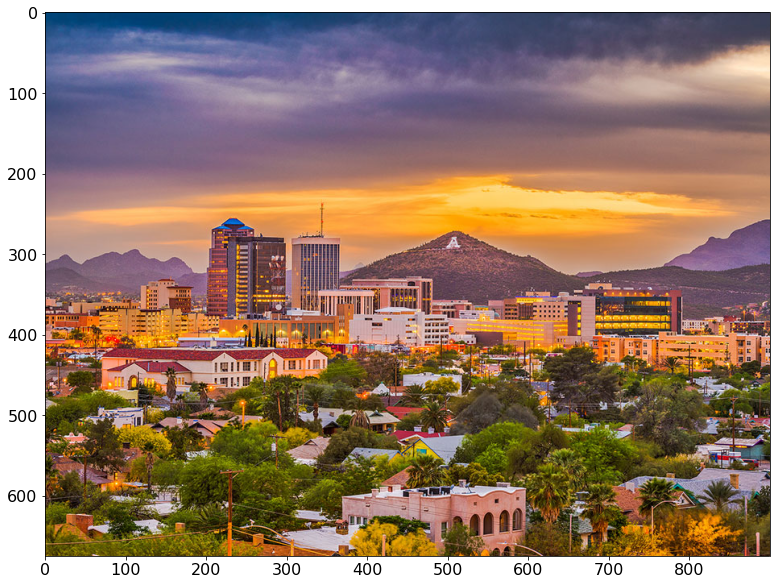

In [38]:
plt.rcParams['figure.figsize'] = [20, 10]
pop = io.imread('Tucson-Skyline.jpg')
plt.imshow(pop)

In [37]:
# Performing Discrete Wavelet Transform 
titles = ['Averages', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(pop[250:506, 550:806], 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

IndexError: ignored

In [ ]:
# Performing Same on Rotated Image
img_rot = scipy.ndimage.rotate(pop, 35)
plt.imshow(img_rot, cmap = plt.cm.gray)

In [ ]:
titles = ['Averages', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(img_rot[350:606, 600:856], 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

### B) Color Images

Text(0.5, 0.98, 'Blue Channel DWT')

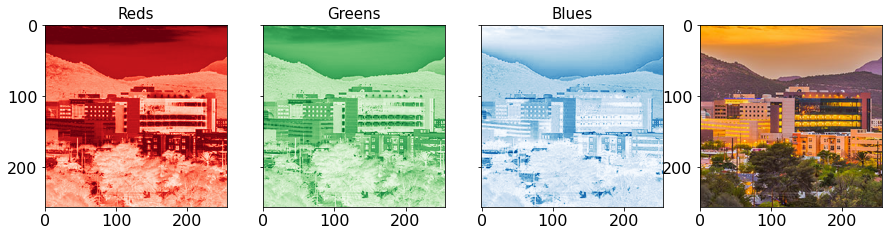

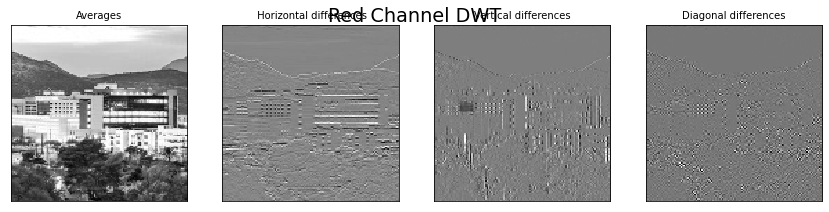

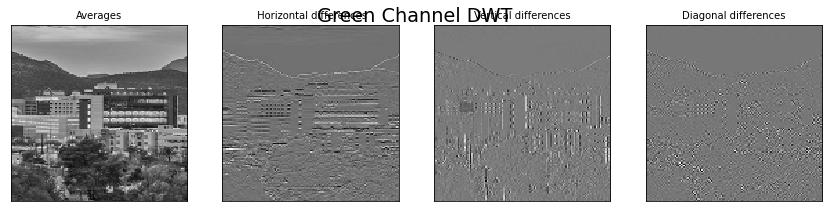

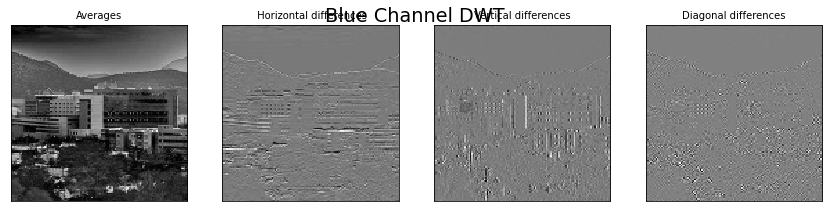

In [39]:
# Separating RGB Channels
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 4, figsize=(15,5), sharey = True)
    plt.subplot(1,4,4)
    plt.imshow(pop[250:506, 550:806])
    for i in range(3):
        ax[i].imshow(image[250:506, 550:806,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 15)
rgb_splitter(pop)

# RED CHANNEL
titles = ['Averages', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(pop[250:506, 550:806, 0], 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.suptitle('Red Channel DWT')

# GREEN CHANNEL
titles = ['Averages', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(pop[250:506, 550:806, 1], 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.suptitle('Green Channel DWT')

# BLUE CHANNEL
titles = ['Averages', ' Horizontal differences',
          'Vertical differences', 'Diagonal differences']
coeffs2 = pywt.dwt2(pop[250:506, 550:806, 2], 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
fig.suptitle('Blue Channel DWT')


### C) Discussion

I have chosen an image of the Tucson skyline for this exercise due to the distinct horizontal and vertical details in the image. It is also very colorful, so is well suited for the color plane analysis. 

For the first exercise, we can see after applying the DWT, the horizontal and vertical components are distinctly represented. We can observe in the horizontal and vertical difference images that the high frequencies "cluster" around the edges of details. The high freuqncies along the horizontal direction are apparent in the "horizontal differences" image, and likewise with the vertical and diagonal images. When the image is rotated, though, these features become slightly less apparent. The horizontal features appear prominant in the vertical differences image, and vice versa. Rotating the image causes the direction of these details to be misinterpreted, and they are presented almost equally. It seemd that the diagnonal differences present primarily "corner" details in the image, where there may be an intersection of horizontal and vertical components. 

The most interesting part of this exercise was applying the DWT to each individual color plane of the image. Overall the image is quite yellow and warm, corresponding to high signal intensity in the red and green color planes compared to the blue color plane. This is observed in the horizontal detail in the yellow clouds of the sky in the horizontal differences in the red and green channels. This is also observed in the horizontal yellow windows of the buildings. The horizontal attributes appear more prominant in these two color planes than in the blue. This can be said for the various colors and corresponding details in the image. One other interesting thing that can be pointed out is that there is a lot of detail showing up in the green color plane. This may be attributed to the higher sampling in "green pixels" due to the pattern of the detector array. We know that detector arrays typically possess a higher number of "green pixels" so as to account for our eyes' heightened response to "green frequencies" over red or blue. It appears there is greater detail in the diagonal differences of the green channel than the red or blue, but further computation and exploration would need to be performed to be sure. 



## **5. Exploring Pixel Parameters**

### A) Exploring Pixel Pitch (constant width)

Text(0.5, 1.0, '$|{\\hat g}(u)|$')

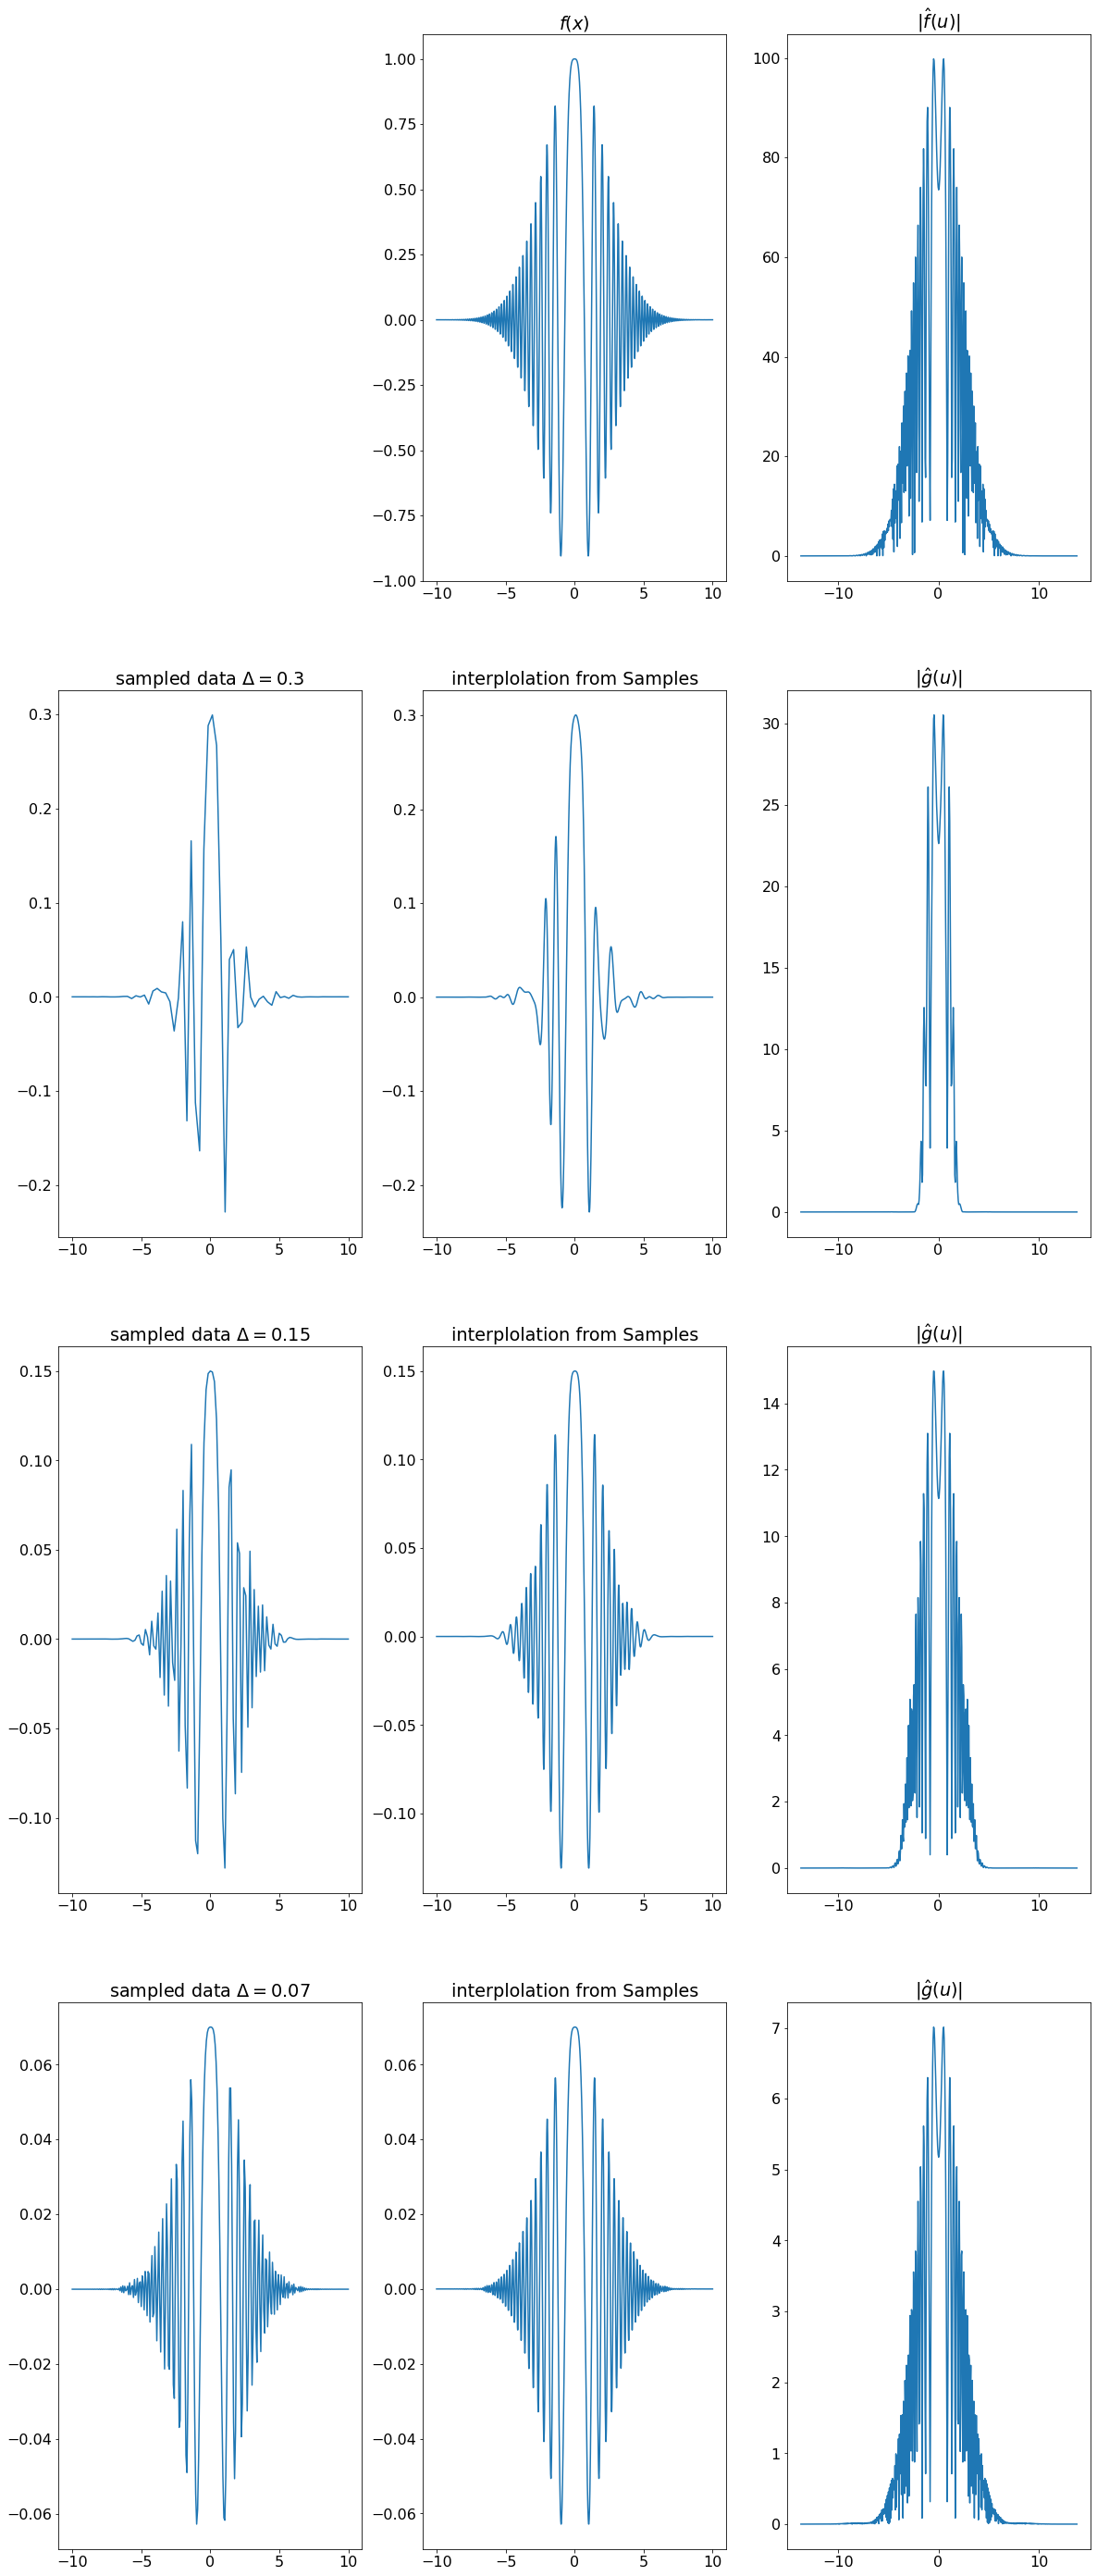

In [151]:
# Defining sampling function as rect(x/delta)
def f(x):
  f = np.cos(2*np.pi*(x**2/2))*np.exp(-x**2/10)
  return f

X = 10
def gn(delta=1):
  N=np.int(2*X/delta)
  gg=np.zeros(N)
  for pop in np.arange(len(gg)):
    gg[pop]=integrate.quad(f,(-X+pop*delta),(-X+(pop+1)*delta))[0]
  return gg

# Exploring PIXEL PITCH
plt.rcParams['figure.figsize'] = [20, 50]
X=10
xrange=np.linspace(-X,X,2048)
urange=np.linspace(-2048/(4*X),2048/(4*X),2048)
plt.subplot(4,3,2)
plt.plot(xrange,f(xrange))
plt.title('$f(x)$')
plt.subplot(4,3,3)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(f(xrange))))[750:1300])
plt.title('$|{\hat f}(u)|$')
plt.subplot(4,3,4)
gN=gn(.3)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.3$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,5)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,6)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,7)
gN=gn(.15)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.15$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,8)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,9)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,10)
gN=gn(.07)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data $\Delta=0.07$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,11)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,12)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')

### B) Exploring Pixel Width (constant pitch)

Text(0.5, 1.0, '$|{\\hat g}(u)|$')

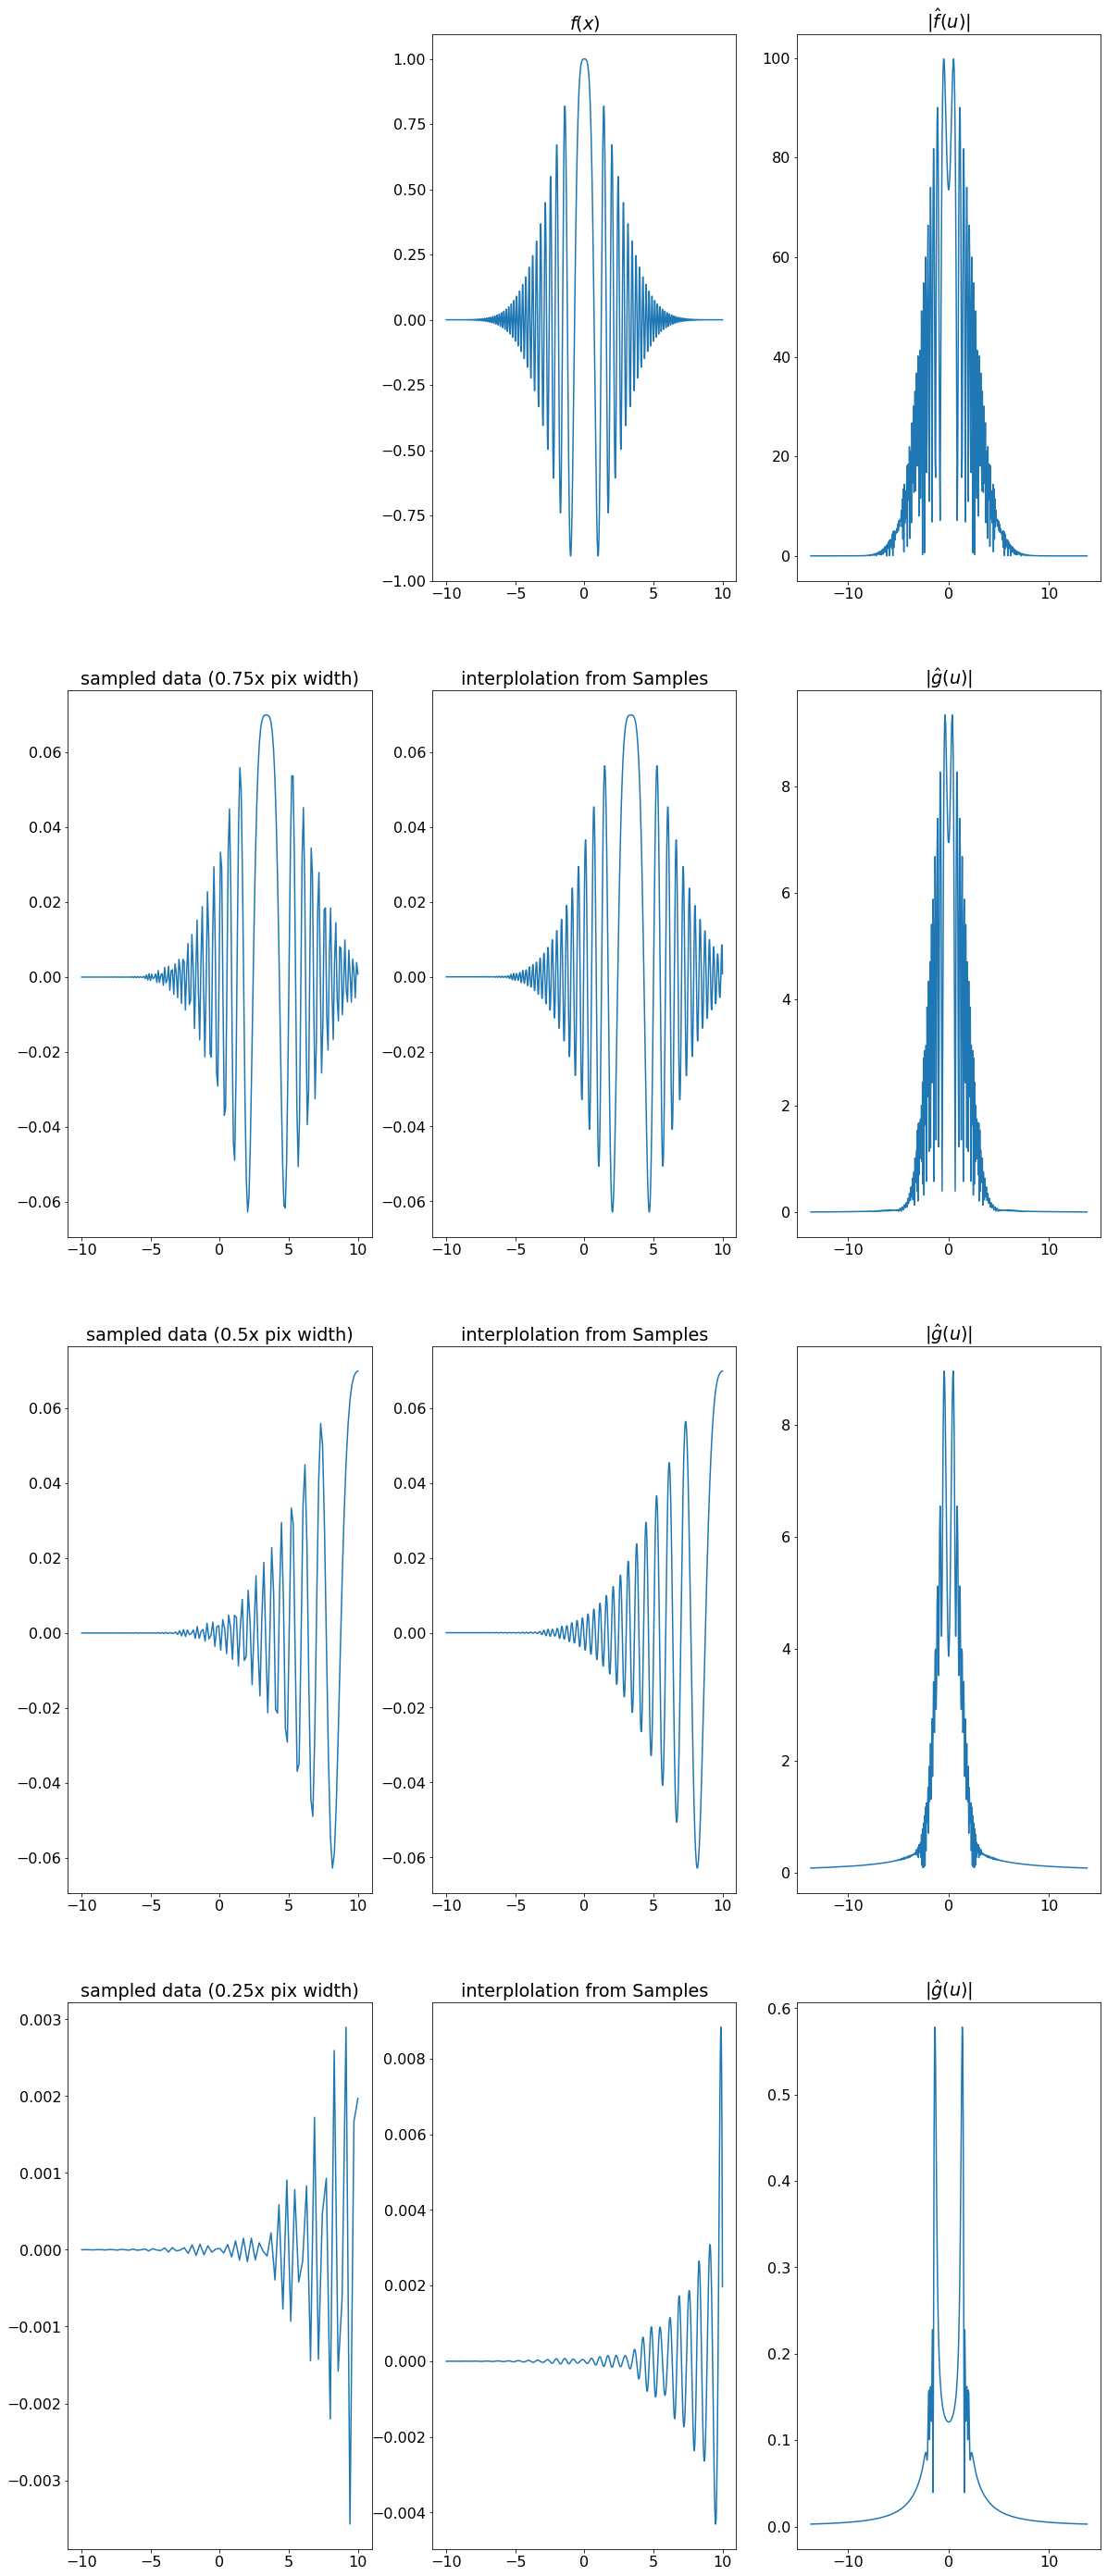

In [159]:
# Exploring PIXEL WIDTH

X = 10
def gn(delta=1, scale = 1):
  N=np.int(2*X*scale/delta)
  gg=np.zeros(N)
  for pop in np.arange(len(gg)):
    gg[pop]=integrate.quad(f,(-X+pop*delta),(-X+(pop+1)*delta))[0]
  return gg

# Changing pixel separation
plt.rcParams['figure.figsize'] = [20, 50]
X=10
xrange=np.linspace(-X,X,2048)
urange=np.linspace(-2048/(4*X),2048/(4*X),2048)

plt.subplot(4,3,2)
plt.plot(xrange,f(xrange))
plt.title('$f(x)$')
plt.subplot(4,3,3)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(f(xrange))))[750:1300])
plt.title('$|{\hat f}(u)|$')

plt.subplot(4,3,4)
gN=gn(0.07, 0.75)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data (0.75x pix width)')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,5)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,6)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')

plt.subplot(4,3,7)
gN=gn(0.07,.5)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data (0.5x pix width)')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,8)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,9)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')

plt.subplot(4,3,10)
gN=gn(0.07, .25)
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('sampled data (0.25x pix width)')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,11)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation from Samples')
plt.subplot(4,3,12)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')


### C) Discussion

We know that pixel pitch (density of pixels) and pixel width have a major impact on image quality and resolution. Finer pixel pitch means greater pixel density, and thus greater pixel resolution due to a greater number of samples within a physical size constraint. This section of the homework demonstrates the effects of various pixel width and pitch. 

In the first section, we assume pixel width is equal to pixel pitch. Varying the value of this parameter, we can observe that as pixel pitch decreases, the closer approximation we obtain of the original signal function. This is also observed in the abs(g(u)) plots... a broader spectrum of frequencies are collected and observed with finer pixel pitch. This makes sense, as a greater pixel pitch corresponds to a fewer number of samples being gathered, and a lesser number of frequencies passed through the system. From this we deduce the theory that as the sampling function becomes narrower, we obtain a higher frequency bandpass. Less aliasing occurs here as "closer" pixels are able to detect higher frequencies. While as the sampling function becomes broader, we obtain a  narrower bandpass, and observe more aliasing. This is again observed in the abs(g(u)) plots in the first section. 

The second section here explores the situation where pixel pitch is held constant, but pixel width is varied. Similar effects are observed in this exercise. Comparing the plots from that of the larger pixel size to the smaller pixel size for a constant pixel pitch, we observe that a larger pixel size is able to observe more frequencies - a better approximation of the original function is obtained with larger pixel size. As pixel size decreases, aliasing begins to occur as there is a much narrower bandpass. 

## **6. Singular Value Spectra** 

### A) 111111111

Text(0.5, 1.0, 'Singular Vectors')

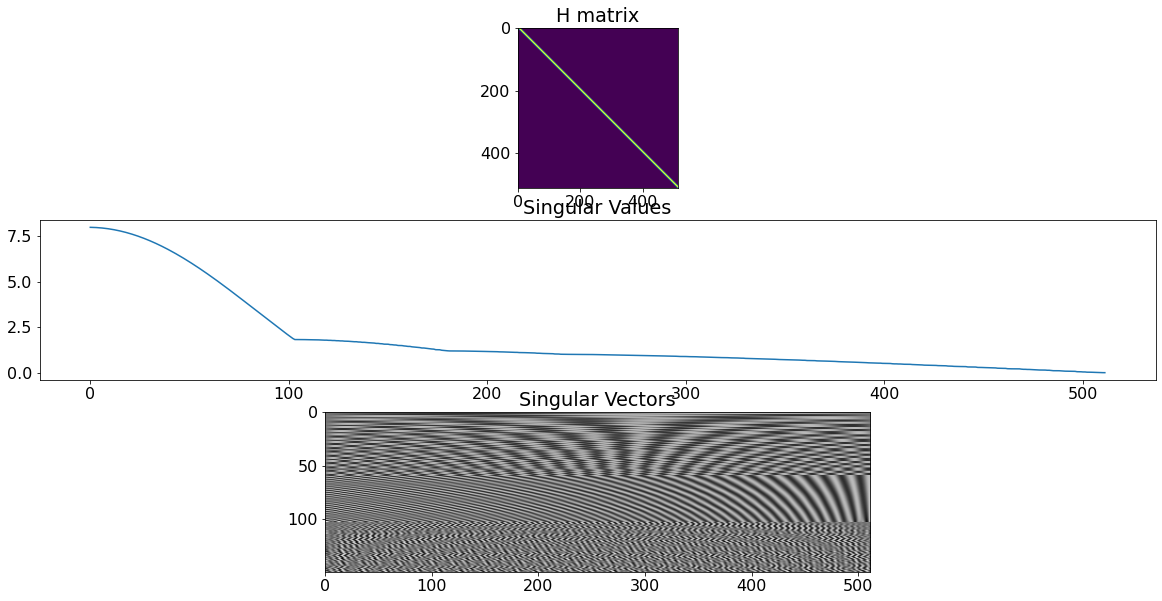

In [17]:
#For [1,1,1,1,1,1,1,1,1] H Matrix
from scipy.linalg import toeplitz
psf=[1,1,1,1,1,1,1,1]
N=512
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=1
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)

# Plotting Data
plt.subplot(3,1,1)
plt.imshow(H)
plt.title('H matrix')
plt.subplot(3,1,2)
plt.plot(s)
plt.title('Singular Values')
plt.subplot(3,1,3)
plt.imshow(vh[0:150,:],cmap='gray')
plt.title('Singular Vectors')

### B) 101101101

Text(0.5, 1.0, 'Singular Vectors')

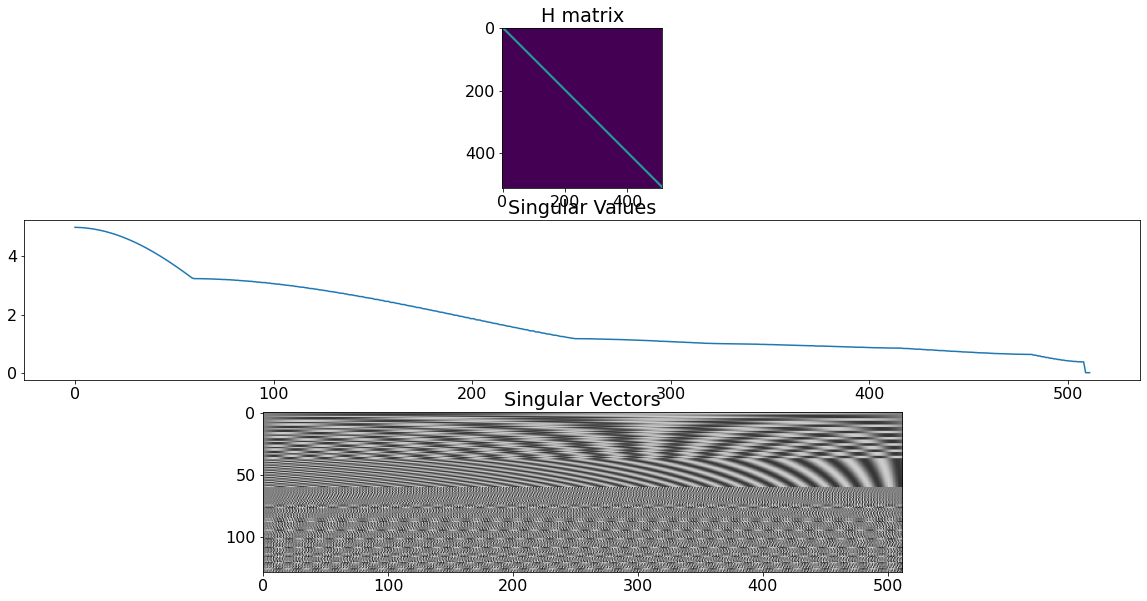

In [18]:
#For [1,0,1,1,0,1,1,0,1] H Matrix
from scipy.linalg import toeplitz
psf=[1,0,1,1,0,1,0,1]
N=512
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=1
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)

# Plotting Data
plt.subplot(3,1,1)
plt.imshow(H)
plt.title('H matrix')
plt.subplot(3,1,2)
plt.plot(s)
plt.title('Singular Values')
plt.subplot(3,1,3)
plt.imshow(vh[0:128,:],cmap='gray')
plt.title('Singular Vectors')

### C) 1 -1 1 1 -1 1 1 -1 1

Text(0.5, 1.0, 'Singular Vectors')

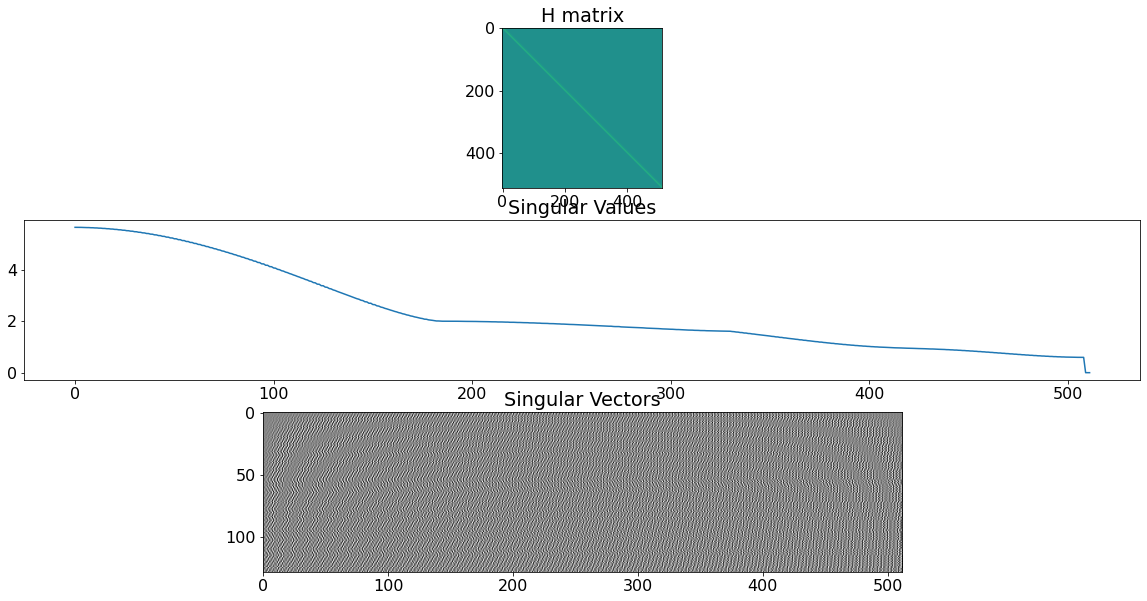

In [19]:
# For [1,-1,1,1,-1,1,1,-1,1] H Matrix
from scipy.linalg import toeplitz
psf=[1,-1,1,1,-1,1,-1,1]
N=512
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=1
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)

# Plotting Data
plt.subplot(3,1,1)
plt.imshow(H)
plt.title('H matrix')
plt.subplot(3,1,2)
plt.plot(s)
plt.title('Singular Values')
plt.subplot(3,1,3)
plt.imshow(vh[0:128,:],cmap='gray')
plt.title('Singular Vectors')

### D) Random Unipolar

Text(0.5, 1.0, 'Singular Vectors')

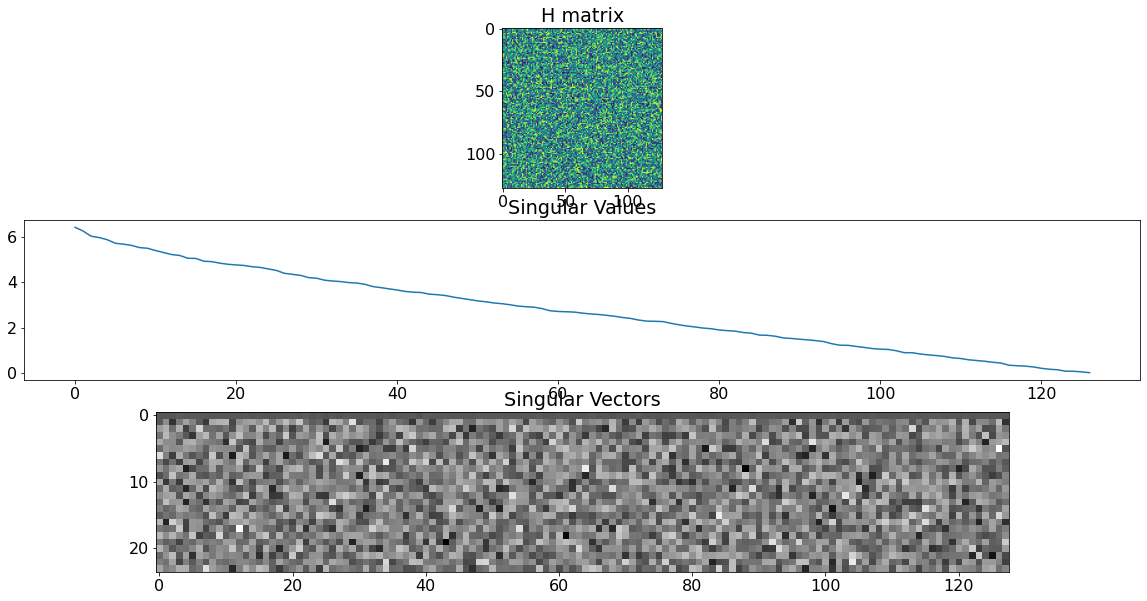

In [20]:
#For Random Unipolar H Matrix
from scipy.linalg import toeplitz
H=np.random.random((128,128))
u, s, vh=np.linalg.svd(H)

# Plotting Data
plt.subplot(3,1,1)
plt.imshow(H)
plt.title('H matrix')
plt.subplot(3,1,2)
plt.plot(s[1:])
plt.title('Singular Values')
plt.subplot(3,1,3)
plt.imshow(vh[0:24,:],cmap='gray')
plt.title('Singular Vectors')

### E) Random Biopolar

Text(0.5, 1.0, 'Singular Vectors')

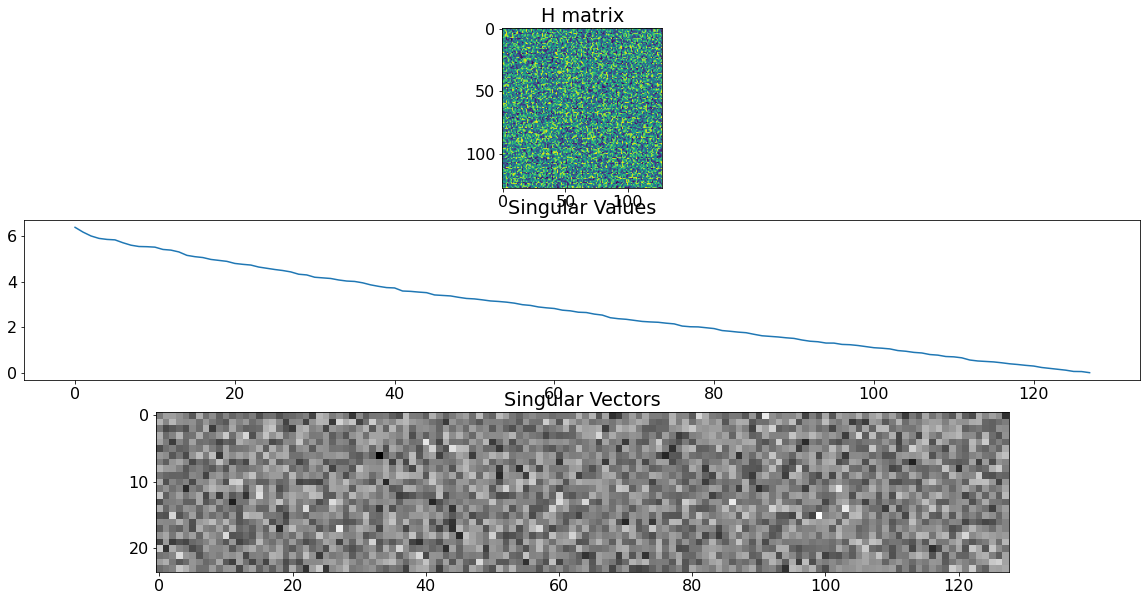

In [21]:
# For Random Bipolar H Matrix
from scipy.linalg import toeplitz
H=np.random.random((128,128))-.5
u, s, vh=np.linalg.svd(H)

# Plotting Data
plt.subplot(3,1,1)
plt.imshow(H)
plt.title('H matrix')
plt.subplot(3,1,2)
plt.plot(s)
plt.title('Singular Values')
plt.subplot(3,1,3)
plt.imshow(vh[0:24,:],cmap='gray')
plt.title('Singular Vectors')

### F) Sinc

Text(0.5, 1.0, 'Singular Vectors')

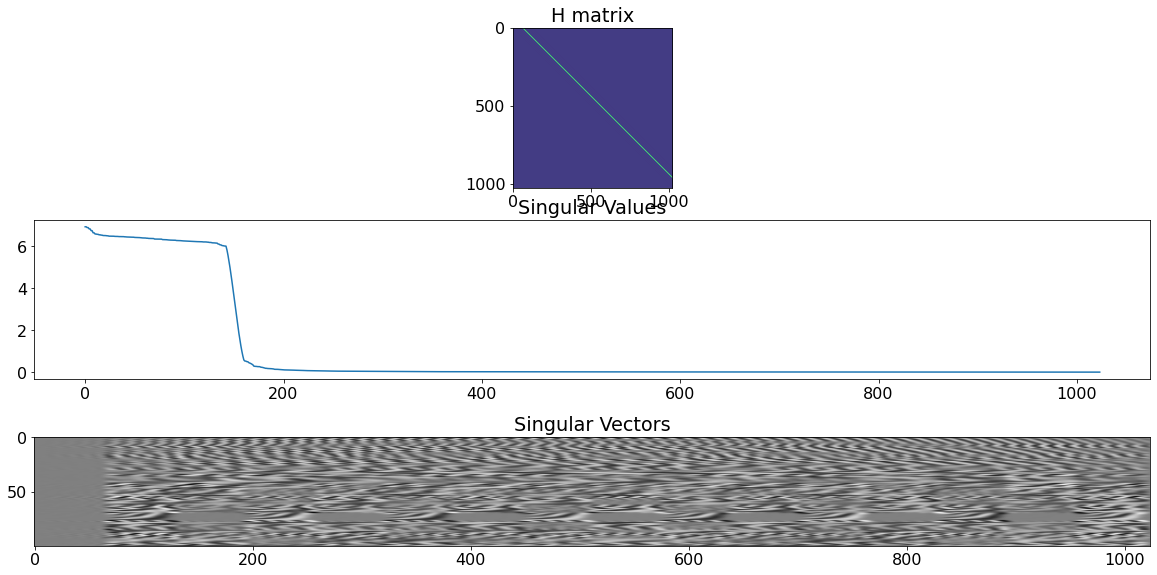

In [22]:
# For Sinc H Matrix
from scipy.linalg import toeplitz
psf=np.sinc(np.linspace(-10,10,128))
N=1024
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=firstRow[0]
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)

# Plotting Data
plt.subplot(3,1,1)
plt.imshow(H)
plt.title('H matrix')
plt.subplot(3,1,2)
plt.plot(s)
plt.title('Singular Values')
plt.subplot(3,1,3)
plt.imshow(vh[0:100,:],cmap='gray')
plt.title('Singular Vectors')

### G) Sinc^2

Text(0.5, 1.0, 'Singular Vectors')

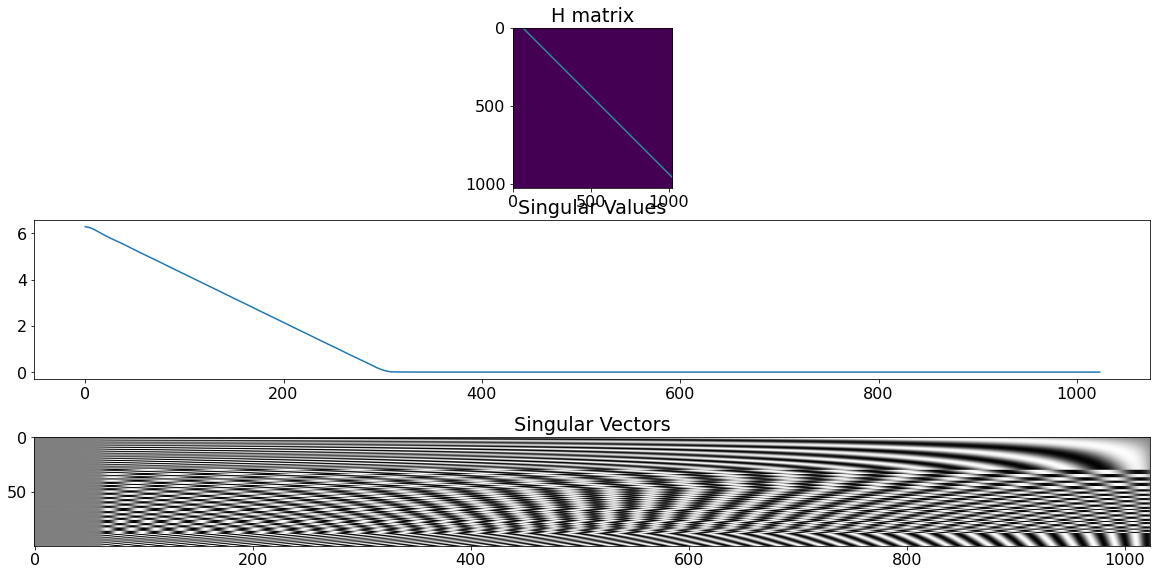

In [23]:
# For Sinc^2 H Matrix
from scipy.linalg import toeplitz
psf=np.abs(np.sinc(np.linspace(-10,10,128)))**2
N=1024
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=firstRow[0]
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)

# Plotting Data
plt.subplot(3,1,1)
plt.imshow(H)
plt.title('H matrix')
plt.subplot(3,1,2)
plt.plot(s)
plt.title('Singular Values')
plt.subplot(3,1,3)
plt.imshow(vh[0:100,:],cmap='gray')
plt.title('Singular Vectors')

### F) Discussion

This portion of the homework aims to demonstrate the importance of H-matrices when analyzing forward models, and their influence on the singular value spectra. 

We can observe that small changes in the forward model, such as the change between parts A) and B), can present dramatic effects in the singular value spectra and vectors. In A) and B), we can see that the small change in the sampling kernel translates to a dramatic change in the singular vectors: we are able to observe much higher frequency response within the lowest 128 order singular vectors in B) compared to A). 

We can also see that these singular vectors and the SVS are able to be manipulated through strategic choice in H-matrices. This is observed in parts F) and G) utilizing the sinc and sinc-squared functions, producing rect- and tri-like SVS, respectively. 